
<center><h1>JSON Exercise</h1> </center>

**Francisco Salas**


Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

## Load Required libraries

In [363]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [364]:
ls data

world_bank_projects.json*  world_bank_projects_less.json*


In [524]:
file_less = 'data/world_bank_projects_less.json'
file_full = 'data/world_bank_projects.json'
df_less = pd.read_json(file_less, ['countryshortname'])
df_full = pd.read_json(file_full)
df_i =pd.read_json(file_full, orient='index')

                    

In [525]:
df_2

code                                          name  \
0       8                             Human development   
1      11                                                 
2       1                           Economic management   
3       6         Social protection and risk management   
4       5                         Trade and integration   
5       2                      Public sector governance   
6      11  Environment and natural resources management   
7       6         Social protection and risk management   
8       7                   Social dev/gender/inclusion   
9       7                   Social dev/gender/inclusion   
10      5                         Trade and integration   
11      4      Financial and private sector development   
12      6         Social protection and risk management   
13      6                                                 
14      2                      Public sector governance   
15      4      Financial and private sector development   
16     11  Environment and natural resources management   
17      8                                                 
18     10                             Rural development   
19      7                                                 
20      2                      Public sector governance   
21      2                      Public sector governance   
22      2                      Public sector governance   
23     10                             Rural development   
24      2                                                 
25     10                             Rural development   
26      6         Social protection and risk management   
27      6         Social protection and risk management   
28     11  Environment and natural resources management   
29      4                                                 
...   ...                                           ...   
1469    8                             Human development   
1470    9                             Urban development   
1471    6         Social protection and risk management   
1472    6         Social protection and risk management   
1473    9                             Urban development   
1474    2                      Public sector governance   
1475    2                      Public sector governance   
1476   10                             Rural development   
1477   11                                                 
1478    8                             Human development   
1479    7                   Social dev/gender/inclusion   
1480   11  Environment and natural resources management   
1481    5                                                 
1482    6         Social protection and risk management   
1483    8                                                 
1484    4      Financial and private sector development   
1485    7                   Social dev/gender/inclusion   
1486    8                             Human development   
1487    5                         Trade and integration   
1488    2                      Public sector governance   
1489    8                             Human development   
1490   10                             Rural development   
1491    6                                                 
1492   10                             Rural development   
1493   10                             Rural development   
1494   10                             Rural development   
1495    9                             Urban development   
1496    8                             Human development   
1497    5                         Trade and integration   
1498    4      Financial and private sector development   

                                                mjtheme  \
0                                   [Human development]   
1                                   [Human development]   
2     [Economic management, Social protection and ri...   
3     [Economic management, Social protection and ri...   
4     [Trade and integration, Public sector governa

## Understand the data 1

- 50 columns with diffrent types
- 500 rows
- several data missing

In [367]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

## Find the 10 countries with most projects

- create a subset
- count values
- plot

In [381]:
df_10 = df_full[['countryshortname','project_name']]
df_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 2 columns):
countryshortname    500 non-null object
project_name        500 non-null object
dtypes: object(2)
memory usage: 11.7+ KB


total rows: 500

### Create a new column


In [382]:
df_10['total_projects'] = df_10.groupby('countryshortname').transform('count')
df_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 3 columns):
countryshortname    500 non-null object
project_name        500 non-null object
total_projects      500 non-null int64
dtypes: int64(1), object(2)
memory usage: 15.6+ KB


/home/salas/miniconda3/envs/springboard/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Count the countries

In [385]:
df_10 = df_10[['countryshortname', 'total_projects']]

In [386]:
by_country = df_10.groupby(['countryshortname']).count()
by_country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, Afghanistan to Zimbabwe
Data columns (total 1 columns):
total_projects    118 non-null int64
dtypes: int64(1)
memory usage: 1.8+ KB


## Solution 1:  Top 10 Countries

In [390]:
by_country =  by_country.sort_values('total_projects',ascending=False)
by_country.head(10)

total_projects
countryshortname                  
China                           19
Indonesia                       19
Vietnam                         17
India                           16
Yemen, Republic of              13
Nepal                           12
Bangladesh                      12
Morocco                         12
Mozambique                      11
Africa                          11

## Solution 1: Plot

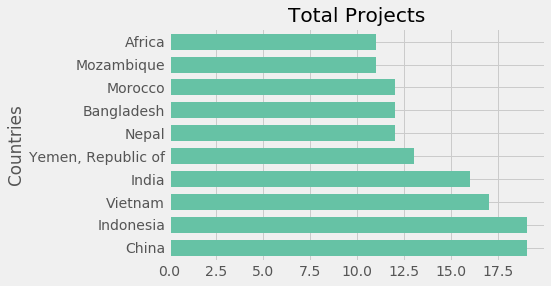

In [400]:
title = 'Top countries with projects'
by_country.head(10).plot(kind='barh', title=title,
                        colormap='Set2',width=.70, legend=False)
#vals_top.plot(kind='bar', title=title)
#plt.legend(vals.index)
plt.style.use('fivethirtyeight')
plt.title('Total Projects')
plt.ylabel('Countries')
plt.show()

# Find the top 10 major project themes (using column 'mjtheme_namecode')
- subset 
- 

In [552]:
json_load = json.load((open('data/world_bank_projects.json')))
df_2 = json_normalize(json_load,'mjtheme_namecode',['mjtheme','project_name'],errors='ignore')
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 4 columns):
code            1499 non-null object
name            1499 non-null object
mjtheme         1490 non-null object
project_name    1499 non-null object
dtypes: object(4)
memory usage: 46.9+ KB


In [553]:
df_2.head()

code                                   name  \
0    8                      Human development   
1   11                                          
2    1                    Economic management   
3    6  Social protection and risk management   
4    5                  Trade and integration   

                                             mjtheme  \
0                                [Human development]   
1                                [Human development]   
2  [Economic management, Social protection and ri...   
3  [Economic management, Social protection and ri...   
4  [Trade and integration, Public sector governan...   

                                        project_name  
0  Ethiopia General Education Quality Improvement...  
1  Ethiopia General Education Quality Improvement...  
2          TN: DTF Social Protection Reforms Support  
3          TN: DTF Social Protection Reforms Support  
4  Tuvalu Aviation Investment Project - Additiona...

In [554]:
#df_2.set_index('countryshortname')
df_2 = df_2[['name','mjtheme', 'project_name']]
df_2.head()

name  \
0                      Human development   
1                                          
2                    Economic management   
3  Social protection and risk management   
4                  Trade and integration   

                                             mjtheme  \
0                                [Human development]   
1                                [Human development]   
2  [Economic management, Social protection and ri...   
3  [Economic management, Social protection and ri...   
4  [Trade and integration, Public sector governan...   

                                        project_name  
0  Ethiopia General Education Quality Improvement...  
1  Ethiopia General Education Quality Improvement...  
2          TN: DTF Social Protection Reforms Support  
3          TN: DTF Social Protection Reforms Support  
4  Tuvalu Aviation Investment Project - Additiona...

## Rename columns

In [556]:
df_2.columns = ['project_theme', 'mjtheme', 'project_name']
df_2.head()

project_theme  \
0                      Human development   
1                                          
2                    Economic management   
3  Social protection and risk management   
4                  Trade and integration   

                                             mjtheme  \
0                                [Human development]   
1                                [Human development]   
2  [Economic management, Social protection and ri...   
3  [Economic management, Social protection and ri...   
4  [Trade and integration, Public sector governan...   

                                        project_name  
0  Ethiopia General Education Quality Improvement...  
1  Ethiopia General Education Quality Improvement...  
2          TN: DTF Social Protection Reforms Support  
3          TN: DTF Social Protection Reforms Support  
4  Tuvalu Aviation Investment Project - Additiona...

## Replace blank values to `np.nan`


In [633]:
df_2full  = df_2.apply(lambda x: x.str.strip() if isinstance(x, str) else x).replace('', np.nan)
df_2full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 3 columns):
project_theme    1377 non-null object
mjtheme          1490 non-null object
project_name     1499 non-null object
dtypes: object(3)
memory usage: 35.2+ KB


## Solution 2 : Top 10 major project themes

In [572]:
solution2 = df_2full.project_theme.value_counts( dropna=False)  # dropna=False to count nan values; NaN  122
solution2

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
NaN                                             122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Economic management                              33
Rule of law                                      12
Name: project_theme, dtype: int64

## Solutuion 2 :Plot

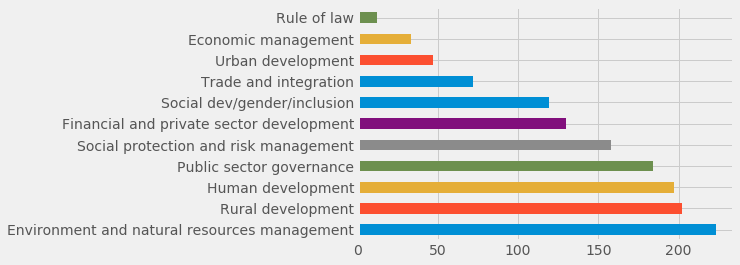

In [569]:
solution2.plot(kind='barh')

In [631]:
df_2[pd.isnull(df_2).any(axis=1)]

project_theme mjtheme                                       project_name
29                     NaN                                GH eTransform Ghana
185                    NaN  Mauritania - TFSCB - Support to NSDS implement...
233                    NaN  Strengthening micro-entrepreneurship for disad...
276                    NaN                 NP: Financial sector stability DPC
277                    NaN       Croatia Export Financing Guarantee Operation
333                    NaN                 China: Nanchang Urban Rail Project
486                    NaN  Lusaka Transmission and Distribution Rehabilit...
824                    NaN  Liaoning Coastal Economic Zone Urban Infrastru...
1414                   NaN  Export Finance Intermediation Loan Additional ...

In [649]:
project_theme = df_2full[['project_theme','mjtheme']]
project_theme.head()

project_theme  \
0                      Human development   
1                                    NaN   
2                    Economic management   
3  Social protection and risk management   
4                  Trade and integration   

                                             mjtheme  
0                                [Human development]  
1                                [Human development]  
2  [Economic management, Social protection and ri...  
3  [Economic management, Social protection and ri...  
4  [Trade and integration, Public sector governan...

In [650]:
# show rows with NaN values
project_theme[pd.isnull(project_theme).any(axis=1)]

project_theme                                         mjtheme
1              NaN                             [Human development]
13             NaN         [Social protection and risk management]
17             NaN  [Environment and natural resources management]
19             NaN                             [Rural development]
24             NaN                             [Rural development]
29             NaN                                             NaN
40             NaN                             [Rural development]
42             NaN                             [Human development]
80             NaN                             [Human development]
98             NaN                             [Rural development]
100            NaN         [Social protection and risk management]
107            NaN                      [Public sector governance]
117            NaN                      [Public sector governance]
119            NaN  [Environment and natural resources management]
121            NaN                             [Human development]
127            NaN  [Environment and natural resources management]
134            NaN  [Environment and natural resources management]
165            NaN                      [Public sector governance]
171            NaN  [Environment and natural resources management]
173            NaN         [Social protection and risk management]
185            NaN                                             NaN
187            NaN                             [Human development]
197            NaN  [Environment and natural resources management]
201            NaN                             [Urban development]
210            NaN  [Environment and natural resources management]
212            NaN                      [Public sector governance]
217            NaN                      [Public sector governance]
230            NaN                             [Human development]
232            NaN                      [Public sector governance]
233            NaN                                             NaN
...            ...                                             ...
1085           NaN                      [Public sector governance]
1114           NaN         [Social protection and risk management]
1124           NaN                             [Rural development]
1178           NaN                             [Rural development]
1203           NaN                   [Social dev/gender/inclusion]
1224           NaN                         [Trade and integration]
1238           NaN         [Social protection and risk management]
1240           NaN         [Social protection and risk management]
1242           NaN  [Environment and natural resources management]
1244           NaN  [Environment and natural resources management]
1258           NaN                           [Economic management]
1268           NaN                             [Rural development]
1277           NaN      [Financial and private sector development]
1319           NaN                             [Urban development]
1329           NaN                   [Social dev/gender/inclusion]
1331           NaN                             [Human development]
1351           NaN                             [Human development]
1358           NaN                             [Human development]
1360           NaN                             [Human development]
1414           NaN                                             NaN
1422           NaN  [Environment and natural resources management]
1424           NaN  [Environment and natural resources management]
1430           NaN                             [Rural development]
1437           NaN                   [Social dev/gender/inclusion]
1439           NaN                      [Public sector governance]
1457           NaN                             [Human development]
1477           NaN                             [Rural development]
1481           NaN  [Environment and natural resourc

In [589]:
json_load = json.load((open('data/world_bank_projects.json')))
df_3 = json_normalize(json_load,'mjtheme_namecode','mjtheme',errors='ignore')
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 3 columns):
code       1499 non-null object
name       1499 non-null object
mjtheme    1490 non-null object
dtypes: object(3)
memory usage: 35.2+ KB


In [608]:
df_3.head()

code                                   name  \
0    8                      Human development   
1   11                                          
2    1                    Economic management   
3    6  Social protection and risk management   
4    5                  Trade and integration   

                                             mjtheme  
0                                [Human development]  
1                                [Human development]  
2  [Economic management, Social protection and ri...  
3  [Economic management, Social protection and ri...  
4  [Trade and integration, Public sector governan...

In [609]:
def splitDataFrameList(df,target_column,separator):
    ''' df = dataframe to split,
    target_column = the column containing the values to split
    separator = the symbol used to perform the split
    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    def splitListToRows(row,row_accumulator,target_column,separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pandas.DataFrame(new_rows)
    return new_df

In [623]:
df_3.mjtheme

0                                     [Human development]
1                                     [Human development]
2       [Economic management, Social protection and ri...
3       [Economic management, Social protection and ri...
4       [Trade and integration, Public sector governan...
5       [Trade and integration, Public sector governan...
6       [Trade and integration, Public sector governan...
7       [Trade and integration, Public sector governan...
8       [Social dev/gender/inclusion, Social dev/gende...
9       [Social dev/gender/inclusion, Social dev/gende...
10      [Trade and integration, Financial and private ...
11      [Trade and integration, Financial and private ...
12                [Social protection and risk management]
13                [Social protection and risk management]
14      [Public sector governance, Financial and priva...
15      [Public sector governance, Financial and priva...
16         [Environment and natural resources management]
17         [En